# Regularizacion  CAP 7

Ejemplo basado en el libro de Deph Learning with Python sobre "$Classifying$ $movie$ $reviews$" (cap. 3.4) con caracteristicas de la seccion de regularizacion (cap. 4.4)

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

C:\Users\Gustavo\anaconda3\envs\deeplearning\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Gustavo\anaconda3\envs\deeplearning\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data), len(test_data)

(25000, 25000)

In [4]:
import numpy as np
## creacion de funcion que crea un tensor a partir de los datos
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) ## vector resultante
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
## convertir los datos de entrada en un tensor
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

In [7]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
from keras import optimizers
from keras import losses
from keras import metrics

In [9]:
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.5211 - acc: 0.7997 - val_loss: 0.4296 - val_acc: 0.8323
Epoch 2/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.3233 - acc: 0.8981 - val_loss: 0.3134 - val_acc: 0.8871
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2364 - acc: 0.9236 - val_loss: 0.2804 - val_acc: 0.8910
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1840 - acc: 0.9415 - val_loss: 0.2810 - val_acc: 0.8867
Epoch 5/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1468 - acc: 0.9535 - val_loss: 0.2786 - val_acc: 0.8875
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1248 - acc: 0.9596 - val_loss: 0.2884 - val_acc: 0.8843
Epoch 7/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1034 - acc: 0.9675 - val_loss: 0.3009 - val_a

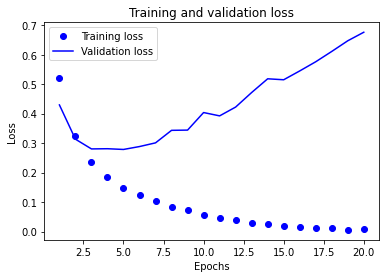

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

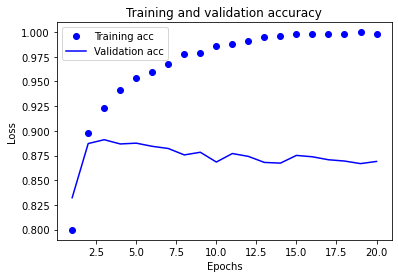

In [11]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
25000/25000 [==============================] - 1s 56us/step - loss: 0.4518 - accuracy: 0.8192
Epoch 2/3
25000/25000 [==============================] - 1s 55us/step - loss: 0.2580 - accuracy: 0.9116
Epoch 3/3
25000/25000 [==============================] - 2s 73us/step


In [13]:
results

[0.2841049952316284, 0.8872399926185608]

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art
approaches, you should be able to get close to 95%.

In [14]:
model.predict(x_test)

array([[0.23667186],
       [0.99782556],
       [0.91756785],
       ...,
       [0.1275276 ],
       [0.1236745 ],
       [0.72135204]], dtype=float32)

# Regularizacion L2

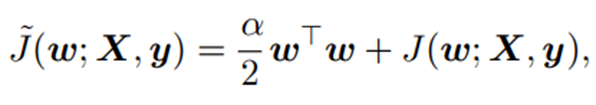

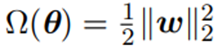

#### En primer lugar vamos analizar distintos  $\alpha $ para  observar como afecta a la regularizacion 


## $\alpha$= 0.01

In [15]:
from keras import regularizers

model_L2 = models.Sequential()
model_L2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),activation='relu', input_shape=(10000,)))
model_L2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model_L2.add(layers.Dense(1, activation='sigmoid'))

In [16]:
x_val_L2 = x_train[:10000]
partial_x_train_L2 = x_train[10000:]
y_val_L2 = y_train[:10000]
partial_y_train_L2 = y_train[10000:]

model_L2.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model_L2.fit(partial_x_train_L2,partial_y_train_L2,epochs=20,batch_size=512,validation_data=(x_val_L2, y_val_L2))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.7771 - acc: 0.7707 - val_loss: 0.6305 - val_acc: 0.8520
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.5745 - acc: 0.8791 - val_loss: 0.5575 - val_acc: 0.8702
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.5224 - acc: 0.8883 - val_loss: 0.5420 - val_acc: 0.8562
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.4920 - acc: 0.8906 - val_loss: 0.5036 - val_acc: 0.8777
Epoch 5/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.4704 - acc: 0.8936 - val_loss: 0.4880 - val_acc: 0.8791
Epoch 6/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.4552 - acc: 0.8957 - val_loss: 0.4954 - val_acc: 0.8663
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.4448 - acc: 0.8956 - val_loss: 0.4717 - val_acc

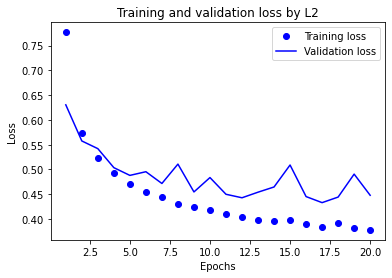

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss by L2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model_L2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_L2.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.4056 - acc: 0.8914
Epoch 2/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.3916 - acc: 0.8966
Epoch 3/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.3851 - acc: 0.8995
Epoch 4/4
25000/25000 [==============================] - 2s 69us/step


In [19]:
results

[0.4221074356842041, 0.8754000067710876]

## Ahora con $\alpha$= 0.001

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.5303 - acc: 0.7864 - val_loss: 0.4009 - val_acc: 0.8716
Epoch 2/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.3331 - acc: 0.9033 - val_loss: 0.3394 - val_acc: 0.8859
Epoch 3/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.2635 - acc: 0.9283 - val_loss: 0.3266 - val_acc: 0.8879
Epoch 4/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2348 - acc: 0.9365 - val_loss: 0.3785 - val_acc: 0.8668
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2138 - acc: 0.9465 - val_loss: 0.4041 - val_acc: 0.8598
Epoch 6/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.2029 - acc: 0.9529 - val_loss: 0.4436 - val_acc: 0.8474
Epoch 7/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1888 - acc: 0.9569 - val_loss: 0.3587 - val_a

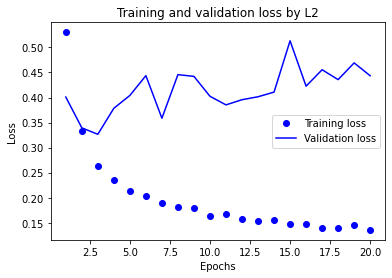

In [20]:
model_L2 = models.Sequential()
model_L2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(10000,)))
model_L2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model_L2.add(layers.Dense(1, activation='sigmoid'))

x_val_L2 = x_train[:10000]
partial_x_train_L2 = x_train[10000:]
y_val_L2 = y_train[:10000]
partial_y_train_L2 = y_train[10000:]

model_L2.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model_L2.fit(partial_x_train_L2,partial_y_train_L2,epochs=20,batch_size=512,validation_data=(x_val_L2, y_val_L2))
history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss by L2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Regularizacion L1

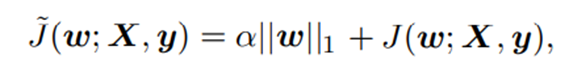
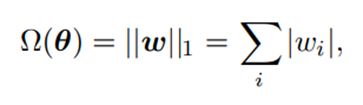

In [21]:
model_L1 = models.Sequential()
model_L1.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu', input_shape=(10000,)))
model_L1.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model_L1.add(layers.Dense(1, activation='sigmoid'))

In [22]:
x_val_L1 = x_train[:10000]
partial_x_train_L1 = x_train[10000:]
y_val_L1 = y_train[:10000]
partial_y_train_L1 = y_train[10000:]

model_L1.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model_L1.fit(partial_x_train_L1,partial_y_train_L1,epochs=20,batch_size=512,validation_data=(x_val_L1, y_val_L1))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 89us/step - loss: 1.0920 - acc: 0.7038 - val_loss: 0.7622 - val_acc: 0.7795
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.7214 - acc: 0.8105 - val_loss: 0.6969 - val_acc: 0.8224
Epoch 3/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.6613 - acc: 0.8377 - val_loss: 0.6865 - val_acc: 0.7909
Epoch 4/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.6217 - acc: 0.8485 - val_loss: 0.6716 - val_acc: 0.7962
Epoch 5/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.5951 - acc: 0.8519 - val_loss: 0.6623 - val_acc: 0.8037
Epoch 6/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.5783 - acc: 0.8588 - val_loss: 0.5821 - val_acc: 0.8579
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.5654 - acc: 0.8602 - val_loss: 0.6108 - val_acc

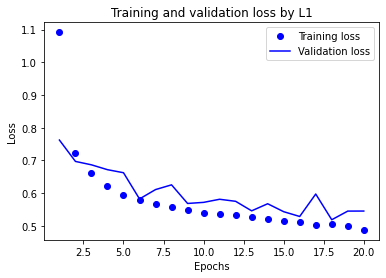

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss by L1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
model_L1.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_L1.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.4998 - acc: 0.8795
Epoch 2/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.4927 - acc: 0.8829
Epoch 3/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.4852 - acc: 0.8840
Epoch 4/4
25000/25000 [==============================] - 2s 67us/step


In [25]:
results

[0.5001762139892578, 0.8727200031280518]

## ahora con $\alpha$ =  0.0001 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.6912 - acc: 0.6857 - val_loss: 0.5601 - val_acc: 0.8208
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.4761 - acc: 0.8759 - val_loss: 0.4338 - val_acc: 0.8781
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.3803 - acc: 0.9011 - val_loss: 0.3815 - val_acc: 0.8874
Epoch 4/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.3375 - acc: 0.9099 - val_loss: 0.3690 - val_acc: 0.8874
Epoch 5/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.3174 - acc: 0.9171 - val_loss: 0.4099 - val_acc: 0.8639
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.3030 - acc: 0.9195 - val_loss: 0.3634 - val_acc: 0.8893
Epoch 7/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.2832 - acc: 0.9292 - val_loss: 0.3688 - val_a

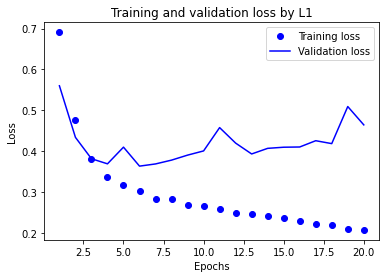

In [26]:
model_L1 = models.Sequential()
model_L1.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),activation='relu', input_shape=(10000,)))
model_L1.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),activation='relu'))
model_L1.add(layers.Dense(1, activation='sigmoid'))

x_val_L1 = x_train[:10000]
partial_x_train_L1 = x_train[10000:]
y_val_L1 = y_train[:10000]
partial_y_train_L1 = y_train[10000:]

model_L1.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model_L1.fit(partial_x_train_L1,partial_y_train_L1,epochs=20,batch_size=512,validation_data=(x_val_L1, y_val_L1))

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss by L1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
model_L1.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_L1.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2928 - acc: 0.9276
Epoch 2/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.2692 - acc: 0.9345
Epoch 3/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2579 - acc: 0.9368
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step


[0.4116417088890076, 0.8741599917411804]

# Dropout

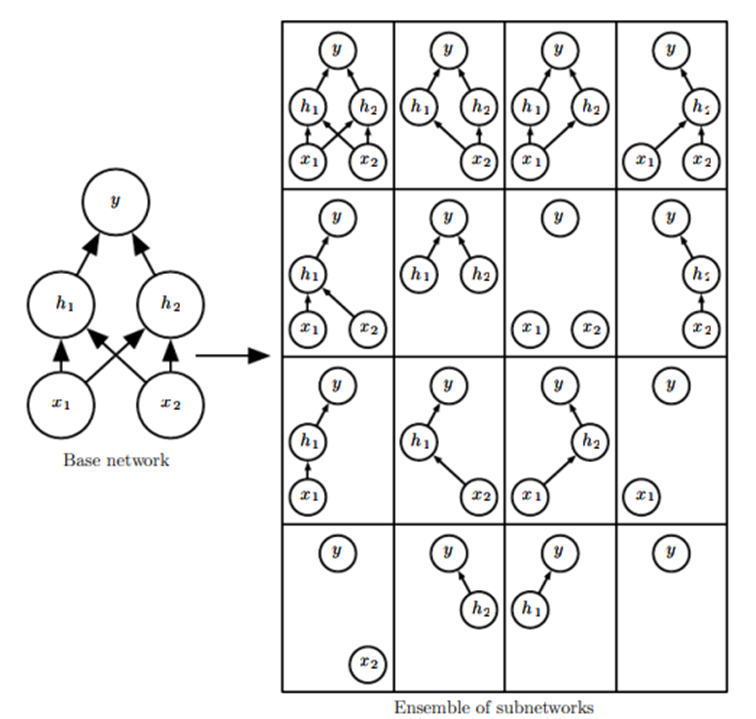

In [41]:
model_DO = models.Sequential()
model_DO.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_DO.add(layers.Dropout(0.5))
model_DO.add(layers.Dense(16, activation='relu'))
model_DO.add(layers.Dropout(0.5))
model_DO.add(layers.Dense(1, activation='sigmoid'))

In [42]:
x_val_DO = x_train[:10000]
partial_x_train_DO = x_train[10000:]
y_val_DO = y_train[:10000]
partial_y_train_DO = y_train[10000:]

model_DO.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model_DO.fit(partial_x_train_DO,partial_y_train_DO,epochs=20,batch_size=512,validation_data=(x_val_DO, y_val_DO))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.6286 - acc: 0.6435 - val_loss: 0.5231 - val_acc: 0.8189
Epoch 2/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.4936 - acc: 0.7763 - val_loss: 0.3920 - val_acc: 0.8696
Epoch 3/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.4117 - acc: 0.8351 - val_loss: 0.3309 - val_acc: 0.8791
Epoch 4/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.3468 - acc: 0.8705 - val_loss: 0.3017 - val_acc: 0.8820
Epoch 5/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.2986 - acc: 0.8941 - val_loss: 0.2876 - val_acc: 0.8822
Epoch 6/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.2676 - acc: 0.9081 - val_loss: 0.2835 - val_acc: 0.8896
Epoch 7/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2316 - acc: 0.9231 - val_loss: 0.2886 - val_acc

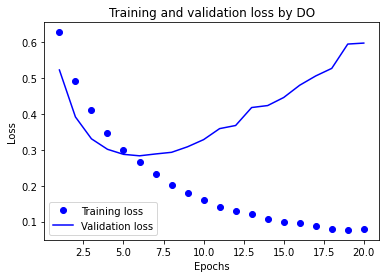

In [43]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss by DO')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
model_DO.fit(x_train, y_train, epochs=7, batch_size=512)
results = model_DO.evaluate(x_test, y_test)

Epoch 1/7
25000/25000 [==============================] - 1s 58us/step - loss: 0.2735 - acc: 0.9230
Epoch 2/7
25000/25000 [==============================] - 1s 58us/step - loss: 0.2218 - acc: 0.9361
Epoch 3/7
25000/25000 [==============================] - 1s 55us/step - loss: 0.1920 - acc: 0.9416
Epoch 4/7
25000/25000 [==============================] - 1s 55us/step - loss: 0.1709 - acc: 0.9476
Epoch 5/7
25000/25000 [==============================] - 1s 55us/step - loss: 0.1612 - acc: 0.9503
Epoch 6/7
25000/25000 [==============================] - 1s 54us/step - loss: 0.1505 - acc: 0.9526
Epoch 7/7
25000/25000 [==============================] - 2s 65us/step


In [46]:
results

[0.4957178899669647, 0.8749600052833557]

## $P_{desercion}=0.8$

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.6920 - acc: 0.5279 - val_loss: 0.6759 - val_acc: 0.6844
Epoch 2/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.6766 - acc: 0.5628 - val_loss: 0.6543 - val_acc: 0.7871
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.6586 - acc: 0.5989 - val_loss: 0.6300 - val_acc: 0.8155
Epoch 4/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.6354 - acc: 0.6299 - val_loss: 0.5749 - val_acc: 0.8465
Epoch 5/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.6196 - acc: 0.6407 - val_loss: 0.5545 - val_acc: 0.8572
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.6054 - acc: 0.6720 - val_loss: 0.5233 - val_acc: 0.8631
Epoch 7/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.5865 - acc: 0.6769 - val_loss: 0.4922 - val_a

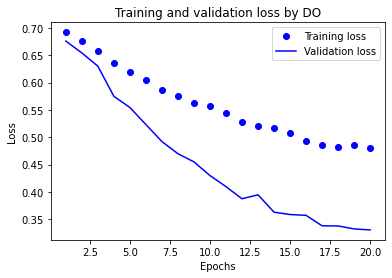

In [32]:
model_DO = models.Sequential()
model_DO.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_DO.add(layers.Dropout(0.8))
model_DO.add(layers.Dense(16, activation='relu'))
model_DO.add(layers.Dropout(0.8))
model_DO.add(layers.Dense(1, activation='sigmoid'))

x_val_DO = x_train[:10000]
partial_x_train_DO = x_train[10000:]
y_val_DO = y_train[:10000]
partial_y_train_DO = y_train[10000:]

model_DO.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model_DO.fit(partial_x_train_DO,partial_y_train_DO,epochs=20,batch_size=512,validation_data=(x_val_DO, y_val_DO))

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss by DO')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
model_DO.fit(x_train, y_train, epochs=20, batch_size=512)
results = model_DO.evaluate(x_test, y_test)
results

Epoch 1/20
25000/25000 [==============================] - 1s 58us/step - loss: 0.1315 - acc: 0.9581
Epoch 2/20
25000/25000 [==============================] - 1s 55us/step - loss: 0.1287 - acc: 0.9572
Epoch 3/20
25000/25000 [==============================] - 2s 61us/step - loss: 0.1254 - acc: 0.9586
Epoch 4/20
25000/25000 [==============================] - 1s 56us/step - loss: 0.1207 - acc: 0.9598
Epoch 5/20
25000/25000 [==============================] - 1s 56us/step - loss: 0.1203 - acc: 0.9600
Epoch 6/20
25000/25000 [==============================] - 1s 56us/step - loss: 0.1155 - acc: 0.9609
Epoch 7/20
25000/25000 [==============================] - 1s 56us/step - loss: 0.1131 - acc: 0.9632
Epoch 8/20
25000/25000 [==============================] - 1s 56us/step - loss: 0.1159 - acc: 0.9617
Epoch 9/20
25000/25000 [==============================] - 1s 57us/step - loss: 0.1025 - acc: 0.9652
Epoch 10/20
25000/25000 [==============================] - 1s 57us/step - loss: 0.1073 - acc: 0.9639

[0.7814473028731346, 0.8639199733734131]

## $P_{desercion}=0.25$

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.5714 - acc: 0.7235 - val_loss: 0.4401 - val_acc: 0.8641
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.4064 - acc: 0.8512 - val_loss: 0.3654 - val_acc: 0.8603
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.3159 - acc: 0.8899 - val_loss: 0.2949 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2579 - acc: 0.9128 - val_loss: 0.3128 - val_acc: 0.8773
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2156 - acc: 0.9298 - val_loss: 0.2883 - val_acc: 0.8819
Epoch 6/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1781 - acc: 0.9437 - val_loss: 0.2809 - val_acc: 0.8888
Epoch 7/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1487 - acc: 0.9534 - val_loss: 0.2957 - val_a

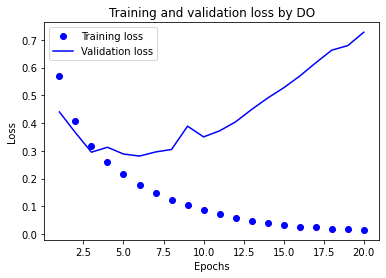

In [35]:
model_DO = models.Sequential()
model_DO.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_DO.add(layers.Dropout(0.25))
model_DO.add(layers.Dense(16, activation='relu'))
model_DO.add(layers.Dropout(0.25))
model_DO.add(layers.Dense(1, activation='sigmoid'))

x_val_DO = x_train[:10000]
partial_x_train_DO = x_train[10000:]
y_val_DO = y_train[:10000]
partial_y_train_DO = y_train[10000:]

model_DO.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model_DO.fit(partial_x_train_DO,partial_y_train_DO,epochs=20,batch_size=512,validation_data=(x_val_DO, y_val_DO))

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss by DO')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
model_DO.fit(x_train, y_train, epochs=3, batch_size=512)
results = model_DO.evaluate(x_test, y_test)
results

Epoch 1/3
25000/25000 [==============================] - 2s 60us/step - loss: 0.1049 - acc: 0.9679
Epoch 2/3
25000/25000 [==============================] - 1s 57us/step - loss: 0.0997 - acc: 0.9690
Epoch 3/3
25000/25000 [==============================] - 2s 64us/step


[0.7591965148925781, 0.8634799718856812]

## $P_{desercion}=0.8$ para la entrada capa, $P_{desercion}=0.5$ para primera capa y una $P_{desercion}=0.25$ para la segunda

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.6819 - acc: 0.5571 - val_loss: 0.6274 - val_acc: 0.7893
Epoch 2/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.6384 - acc: 0.6345 - val_loss: 0.5454 - val_acc: 0.8306
Epoch 3/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.6057 - acc: 0.6794 - val_loss: 0.4993 - val_acc: 0.8520
Epoch 4/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.5707 - acc: 0.7067 - val_loss: 0.4601 - val_acc: 0.8597
Epoch 5/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.5522 - acc: 0.7234 - val_loss: 0.4387 - val_acc: 0.8634
Epoch 6/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.5414 - acc: 0.7347 - val_loss: 0.4216 - val_acc: 0.8703
Epoch 7/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.5311 - acc: 0.7428 - val_loss: 0.4164 - 

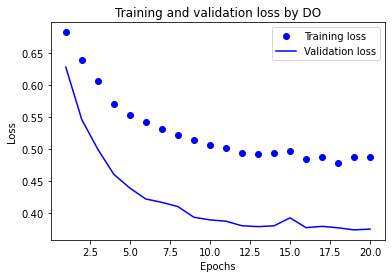

In [37]:
model_DO = models.Sequential()
model_DO.add(layers.Dropout(0.8))
model_DO.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_DO.add(layers.Dropout(0.5))
model_DO.add(layers.Dense(16, activation='relu'))
model_DO.add(layers.Dropout(0.25))
model_DO.add(layers.Dense(1, activation='sigmoid'))

x_val_DO = x_train[:10000]
partial_x_train_DO = x_train[10000:]
y_val_DO = y_train[:10000]
partial_y_train_DO = y_train[10000:]

model_DO.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=['acc'])
history = model_DO.fit(partial_x_train_DO,partial_y_train_DO,epochs=20,batch_size=512,validation_data=(x_val_DO, y_val_DO))

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.clf()
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss by DO')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
model_DO.fit(x_train, y_train, epochs=4, batch_size=512)
results = model_DO.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.4970 - acc: 0.7686
Epoch 2/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.4894 - acc: 0.7732
Epoch 3/4
25000/25000 [==============================] - 3s 133us/step - loss: 0.4924 - acc: 0.7688
Epoch 4/4
25000/25000 [==============================] - 2s 63us/step


[0.39037635380744934, 0.8792799711227417]